In [10]:
from dns.dnssecalgs import algorithms

from ml_dcs.config import config # NOQA

SIMPLE_INPUT_PATH = lambda algorithm: f"tmp/prod-results/results-20241220/20241220_calculation-time_ArtGallery/simple/20241218-234521/testing-result_{algorithm}.json"
GNN_INPUT_PATH_L1 = "tmp/prod-results/results-20241220/20241220_calculation-time_ArtGallery/gnn-L1/20241218-235544/testing-result.json"
GNN_INPUT_PATH_L2 = "tmp/prod-results/results-20241220/20241220_calculation-time_ArtGallery/gnn-L2/20241219-003515/testing-result.json"
GNN_INPUT_PATH_L3 = "tmp/prod-results/results-20241220/20241220_calculation-time_ArtGallery/gnn-L3/20241219-005852/testing-result.json"
X_LABEL = "Actual values (s)"
Y_LABEL = "Predicted values (s)"
ORDER_OF_MAG = 2
LIM = (-0.5 * 10**ORDER_OF_MAG, 4 * 10**ORDER_OF_MAG)

results_mae = []
results_rmse = []

{
  "algorithm": "Random Forest",
  "results": [
    {
      "algorithm": "Random Forest",
      "random_state": 42,
      "duration": "PT0.008197S",
      "mae": 28908.489018415177,
      "mse": 1966828744.534116,
      "rmse": 44348.9429922982,
      "r_squared": 0.35039136645412017
    }
  ],
  "result_at_best_accuracy": {
    "algorithm": "Random Forest",
    "random_state": 42,
    "lts_names": [
      "ArtGallery（N, 2 room）_000106",
      "ArtGallery（N, 2 room）_000010",
      "ArtGallery（N, 2 room）_000131",
      "ArtGallery（N, 2 room）_000148",
      "ArtGallery（N, 3 room）_000068",
      "ArtGallery（N, 4 room）_000064",
      "ArtGallery（N, 4 room）_000029",
      "ArtGallery（N, 2 room）_000064",
      "ArtGallery（N, 3 room）_000018",
      "ArtGallery（N, 3 room）_000131",
      "ArtGallery（N, 4 room）_000050",
      "ArtGallery（N, 4 room）_000069",
      "ArtGallery（N, 2 room）_000111",
      "ArtGallery（N, 3 room）_000040",
      "ArtGallery（N, 2 room）_000055",
      "ArtGallery（N, 3 ro

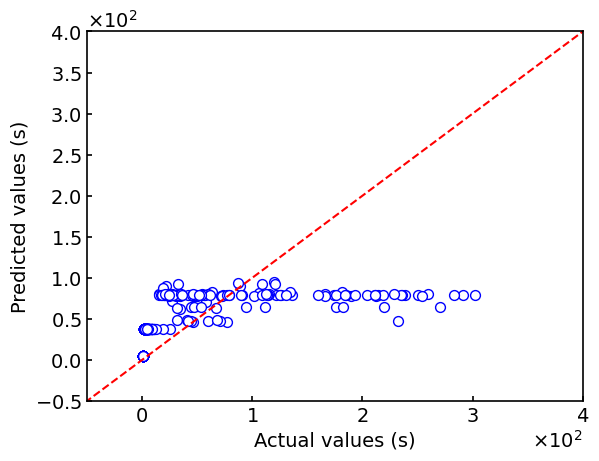

,lts,actual_values,predicted_values
12,"ArtGallery（N, 2 room）_000111",0.513,4.704765
63,"ArtGallery（N, 2 room）_000074",0.545,4.869131
14,"ArtGallery（N, 2 room）_000055",0.545,4.858391
120,"ArtGallery（N, 2 room）_000160",0.546,4.852671
246,"ArtGallery（N, 2 room）_000037",0.553,4.755921
...,...,...,...
317,"ArtGallery（N, 4 room）_000079",259.262,79.951924
322,"ArtGallery（N, 4 room）_000197",270.767,64.006830
284,"ArtGallery（N, 4 room）_000010",283.268,79.338784
105,"ArtGallery（N, 4 room）_000091",291.496,78.851639


In [11]:
from ml_dcs.domain.evaluation import EvaluationResult
from ml_dcs.internal.graph.graph import GraphUtil
import json
from ml_dcs.domain.ml_simple import MLSimpleTestingResultSet
from ml_dcs.domain.graph import Graph, PredictionAccuracyGraphData

with open(SIMPLE_INPUT_PATH("RF"), "r") as f:
    data_dict = json.load(f)
data_model = MLSimpleTestingResultSet(**data_dict)
print(data_model.model_dump_json(indent=2, by_alias=True))
data = PredictionAccuracyGraphData.from_ml_simple_class_div1000(data_model)
graph = Graph(
    data=data,
    x_label=X_LABEL,
    y_label=Y_LABEL,
    x_lim=LIM,
    y_lim=LIM,
    order_of_mag=ORDER_OF_MAG
)
util = GraphUtil(graph)
util.show()

results_mae.append(data_model.result_at_best_accuracy.mae)
results_rmse.append(data_model.result_at_best_accuracy.rmse)

EvaluationResult.from_simple_class(data_model).dataframe_div1000

{
  "algorithm": "Gradient Boosting Decision Tree",
  "results": [
    {
      "algorithm": "Gradient Boosting Decision Tree",
      "random_state": 42,
      "duration": "PT0.000797S",
      "mae": 22661.127319263076,
      "mse": 1907824558.6862266,
      "rmse": 43678.65106303337,
      "r_squared": 0.36987940202847003
    }
  ],
  "result_at_best_accuracy": {
    "algorithm": "Gradient Boosting Decision Tree",
    "random_state": 42,
    "lts_names": [
      "ArtGallery（N, 2 room）_000106",
      "ArtGallery（N, 2 room）_000010",
      "ArtGallery（N, 2 room）_000131",
      "ArtGallery（N, 2 room）_000148",
      "ArtGallery（N, 3 room）_000068",
      "ArtGallery（N, 4 room）_000064",
      "ArtGallery（N, 4 room）_000029",
      "ArtGallery（N, 2 room）_000064",
      "ArtGallery（N, 3 room）_000018",
      "ArtGallery（N, 3 room）_000131",
      "ArtGallery（N, 4 room）_000050",
      "ArtGallery（N, 4 room）_000069",
      "ArtGallery（N, 2 room）_000111",
      "ArtGallery（N, 3 room）_000040",
      "

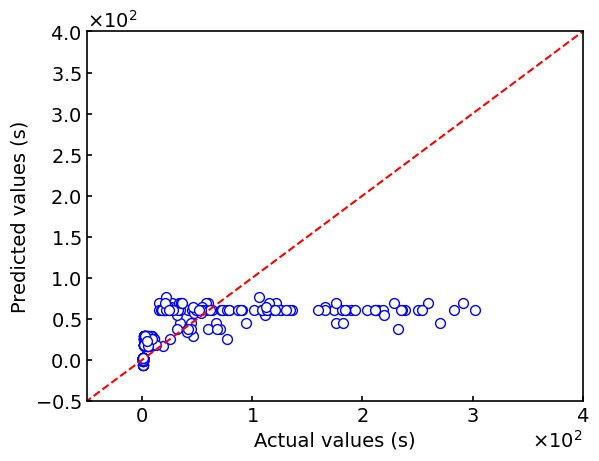

,lts,actual_values,predicted_values
12,"ArtGallery（N, 2 room）_000111",0.513,3.035056
63,"ArtGallery（N, 2 room）_000074",0.545,2.959674
14,"ArtGallery（N, 2 room）_000055",0.545,2.250654
120,"ArtGallery（N, 2 room）_000160",0.546,2.438259
246,"ArtGallery（N, 2 room）_000037",0.553,2.664661
...,...,...,...
317,"ArtGallery（N, 4 room）_000079",259.262,69.836807
322,"ArtGallery（N, 4 room）_000197",270.767,45.462536
284,"ArtGallery（N, 4 room）_000010",283.268,60.640509
105,"ArtGallery（N, 4 room）_000091",291.496,69.836807


In [12]:
from ml_dcs.internal.graph.graph import GraphUtil
import json
from ml_dcs.domain.ml_simple import MLSimpleTestingResultSet
from ml_dcs.domain.graph import Graph, PredictionAccuracyGraphData

with open(SIMPLE_INPUT_PATH("GBDT"), "r") as f:
    data_dict = json.load(f)
data_model = MLSimpleTestingResultSet(**data_dict)
print(data_model.model_dump_json(indent=2, by_alias=True))
data = PredictionAccuracyGraphData.from_ml_simple_class_div1000(data_model)
graph = Graph(
    data=data,
    x_label=X_LABEL,
    y_label=Y_LABEL,
    x_lim=LIM,
    y_lim=LIM,
    order_of_mag=ORDER_OF_MAG
)
util = GraphUtil(graph)
util.show()

results_mae.append(data_model.result_at_best_accuracy.mae)
results_rmse.append(data_model.result_at_best_accuracy.rmse)
EvaluationResult.from_simple_class(data_model).dataframe_div1000

{
  "algorithm": "Decision Tree",
  "results": [
    {
      "algorithm": "Decision Tree",
      "random_state": 42,
      "duration": "PT0.000196S",
      "mae": 36674.533490566035,
      "mse": 2457007567.0745873,
      "rmse": 49568.21125554752,
      "r_squared": 0.18849399944209333
    }
  ],
  "result_at_best_accuracy": {
    "algorithm": "Decision Tree",
    "random_state": 42,
    "lts_names": [
      "ArtGallery（N, 2 room）_000106",
      "ArtGallery（N, 2 room）_000010",
      "ArtGallery（N, 2 room）_000131",
      "ArtGallery（N, 2 room）_000148",
      "ArtGallery（N, 3 room）_000068",
      "ArtGallery（N, 4 room）_000064",
      "ArtGallery（N, 4 room）_000029",
      "ArtGallery（N, 2 room）_000064",
      "ArtGallery（N, 3 room）_000018",
      "ArtGallery（N, 3 room）_000131",
      "ArtGallery（N, 4 room）_000050",
      "ArtGallery（N, 4 room）_000069",
      "ArtGallery（N, 2 room）_000111",
      "ArtGallery（N, 3 room）_000040",
      "ArtGallery（N, 2 room）_000055",
      "ArtGallery（N, 3 

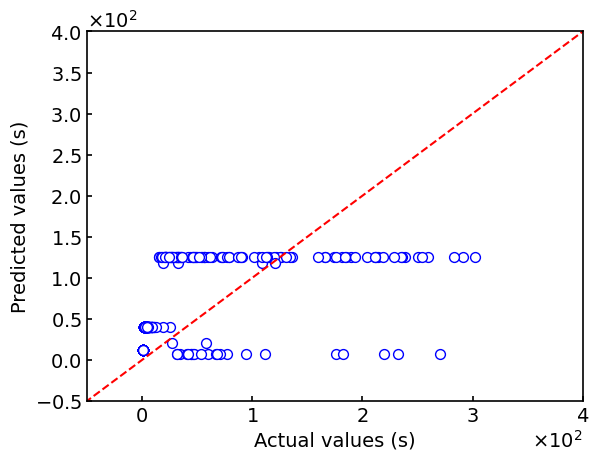

In [13]:
from ml_dcs.internal.graph.graph import GraphUtil
import json
from ml_dcs.domain.ml_simple import MLSimpleTestingResultSet
from ml_dcs.domain.graph import Graph, PredictionAccuracyGraphData

with open(SIMPLE_INPUT_PATH("DT"), "r") as f:
    data_dict = json.load(f)
data_model = MLSimpleTestingResultSet(**data_dict)
print(data_model.model_dump_json(indent=2, by_alias=True))
data = PredictionAccuracyGraphData.from_ml_simple_class_div1000(data_model)
graph = Graph(
    data=data,
    x_label=X_LABEL,
    y_label=Y_LABEL,
    x_lim=LIM,
    y_lim=LIM,
    order_of_mag=ORDER_OF_MAG
)
util = GraphUtil(graph)
util.show()

results_mae.append(data_model.result_at_best_accuracy.mae)
results_rmse.append(data_model.result_at_best_accuracy.rmse)

{
  "algorithm": "Logistic Regression",
  "results": [
    {
      "algorithm": "Logistic Regression",
      "random_state": 42,
      "duration": "PT0.004412S",
      "mae": 23072.31509433962,
      "mse": 3347132907.5037737,
      "rmse": 57854.41130548105,
      "r_squared": -0.10549860550009815
    }
  ],
  "result_at_best_accuracy": {
    "algorithm": "Logistic Regression",
    "random_state": 42,
    "lts_names": [
      "ArtGallery（N, 2 room）_000106",
      "ArtGallery（N, 2 room）_000010",
      "ArtGallery（N, 2 room）_000131",
      "ArtGallery（N, 2 room）_000148",
      "ArtGallery（N, 3 room）_000068",
      "ArtGallery（N, 4 room）_000064",
      "ArtGallery（N, 4 room）_000029",
      "ArtGallery（N, 2 room）_000064",
      "ArtGallery（N, 3 room）_000018",
      "ArtGallery（N, 3 room）_000131",
      "ArtGallery（N, 4 room）_000050",
      "ArtGallery（N, 4 room）_000069",
      "ArtGallery（N, 2 room）_000111",
      "ArtGallery（N, 3 room）_000040",
      "ArtGallery（N, 2 room）_000055",
     

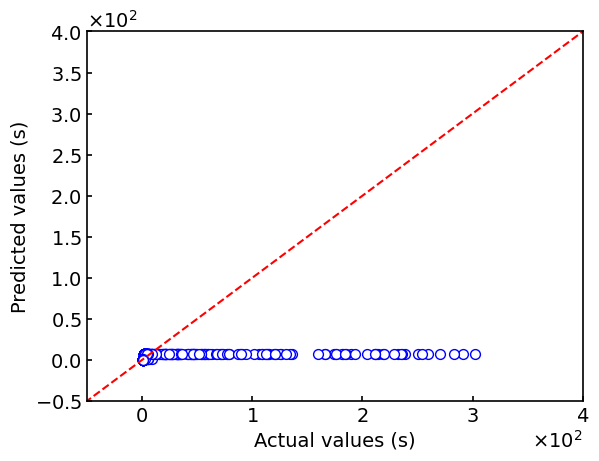

In [14]:
from ml_dcs.internal.graph.graph import GraphUtil
import json
from ml_dcs.domain.ml_simple import MLSimpleTestingResultSet
from ml_dcs.domain.graph import Graph, PredictionAccuracyGraphData

with open(SIMPLE_INPUT_PATH("LR"), "r") as f:
    data_dict = json.load(f)
data_model = MLSimpleTestingResultSet(**data_dict)
print(data_model.model_dump_json(indent=2, by_alias=True))
data = PredictionAccuracyGraphData.from_ml_simple_class_div1000(data_model)
graph = Graph(
    data=data,
    x_label=X_LABEL,
    y_label=Y_LABEL,
    x_lim=LIM,
    y_lim=LIM,
    order_of_mag=ORDER_OF_MAG
)
util = GraphUtil(graph)
util.show()

results_mae.append(data_model.result_at_best_accuracy.mae)
results_rmse.append(data_model.result_at_best_accuracy.rmse)

{
  "task_results": [
    {
      "lts_name": "ArtGallery（N, 2 room）_000106",
      "loss": 2737293.5,
      "actual": 631.0,
      "predicted": -1023.4767456054688,
      "started_at": "2024-12-19T00:25:05.733675",
      "finished_at": "2024-12-19T00:25:05.735009",
      "duration": "PT0.001334S"
    },
    {
      "lts_name": "ArtGallery（N, 2 room）_000010",
      "loss": 2517382.5,
      "actual": 629.0,
      "predicted": -957.6260986328125,
      "started_at": "2024-12-19T00:25:05.735420",
      "finished_at": "2024-12-19T00:25:05.736647",
      "duration": "PT0.001227S"
    },
    {
      "lts_name": "ArtGallery（N, 2 room）_000131",
      "loss": 2618014.0,
      "actual": 1018.0,
      "predicted": -600.0278930664062,
      "started_at": "2024-12-19T00:25:05.737021",
      "finished_at": "2024-12-19T00:25:05.738228",
      "duration": "PT0.001207S"
    },
    {
      "lts_name": "ArtGallery（N, 2 room）_000148",
      "loss": 2901572.0,
      "actual": 746.0,
      "predicted": -957

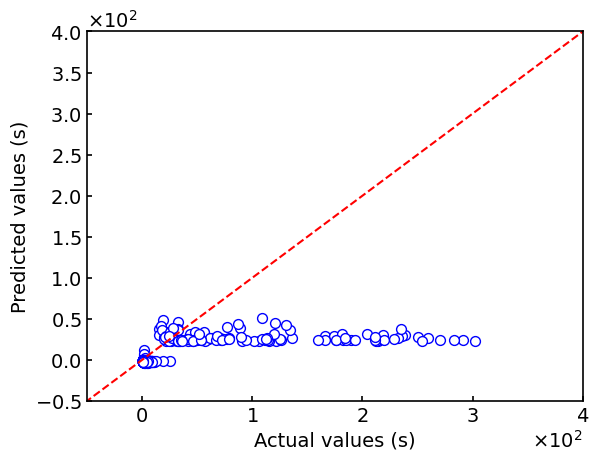

,lts,actual_values,predicted_values
12,"ArtGallery（N, 2 room）_000111",0.513,-2.861561
63,"ArtGallery（N, 2 room）_000074",0.545,-2.781490
14,"ArtGallery（N, 2 room）_000055",0.545,-0.602667
120,"ArtGallery（N, 2 room）_000160",0.546,-1.852736
246,"ArtGallery（N, 2 room）_000037",0.553,-0.645423
...,...,...,...
317,"ArtGallery（N, 4 room）_000079",259.262,27.205715
322,"ArtGallery（N, 4 room）_000197",270.767,24.793885
284,"ArtGallery（N, 4 room）_000010",283.268,24.903943
105,"ArtGallery（N, 4 room）_000091",291.496,24.026709


In [15]:
from ml_dcs.internal.graph.graph import GraphUtil
import json
from ml_dcs.domain.ml_gnn import GNNTestingResult
from ml_dcs.domain.graph import Graph, PredictionAccuracyGraphData

with open(GNN_INPUT_PATH_L1, "r") as f:
    data_dict = json.load(f)
data_model = GNNTestingResult(**data_dict)
print(data_model.model_dump_json(indent=2, by_alias=True))
data = PredictionAccuracyGraphData.from_ml_gnn_class_div1000(data_model)
graph = Graph(
    data=data,
    x_label=X_LABEL,
    y_label=Y_LABEL,
    x_lim=LIM,
    y_lim=LIM,
    order_of_mag=ORDER_OF_MAG
)
util = GraphUtil(graph)
util.show()

results_mae.append(data_model.mae)
results_rmse.append(data_model.rmse)

EvaluationResult.from_gnn_class(data_model).dataframe_div1000

{
  "task_results": [
    {
      "lts_name": "ArtGallery（N, 2 room）_000106",
      "loss": 17114180.0,
      "actual": 631.0,
      "predicted": -3505.928466796875,
      "started_at": "2024-12-19T00:48:42.180401",
      "finished_at": "2024-12-19T00:48:42.182575",
      "duration": "PT0.002174S"
    },
    {
      "lts_name": "ArtGallery（N, 2 room）_000010",
      "loss": 17097628.0,
      "actual": 629.0,
      "predicted": -3505.927734375,
      "started_at": "2024-12-19T00:48:42.183021",
      "finished_at": "2024-12-19T00:48:42.195615",
      "duration": "PT0.012594S"
    },
    {
      "lts_name": "ArtGallery（N, 2 room）_000131",
      "loss": 17642198.0,
      "actual": 1018.0,
      "predicted": -3182.26171875,
      "started_at": "2024-12-19T00:48:42.201993",
      "finished_at": "2024-12-19T00:48:42.204156",
      "duration": "PT0.002163S"
    },
    {
      "lts_name": "ArtGallery（N, 2 room）_000148",
      "loss": 18078890.0,
      "actual": 746.0,
      "predicted": -3505.92

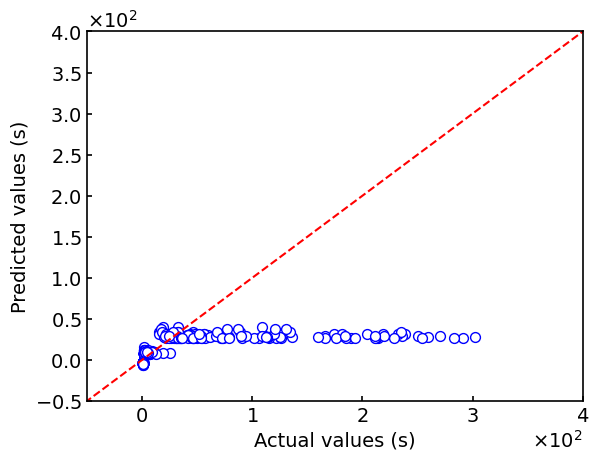

,lts,actual_values,predicted_values
12,"ArtGallery（N, 2 room）_000111",0.513,-6.301822
63,"ArtGallery（N, 2 room）_000074",0.545,-6.301822
14,"ArtGallery（N, 2 room）_000055",0.545,-3.182262
120,"ArtGallery（N, 2 room）_000160",0.546,-4.506366
246,"ArtGallery（N, 2 room）_000037",0.553,-3.182262
...,...,...,...
317,"ArtGallery（N, 4 room）_000079",259.262,28.080211
322,"ArtGallery（N, 4 room）_000197",270.767,28.672006
284,"ArtGallery（N, 4 room）_000010",283.268,27.014787
105,"ArtGallery（N, 4 room）_000091",291.496,26.904936


In [16]:
from ml_dcs.internal.graph.graph import GraphUtil
import json
from ml_dcs.domain.ml_gnn import GNNTestingResult
from ml_dcs.domain.graph import Graph, PredictionAccuracyGraphData

with open(GNN_INPUT_PATH_L2, "r") as f:
    data_dict = json.load(f)
data_model = GNNTestingResult(**data_dict)
print(data_model.model_dump_json(indent=2, by_alias=True))
data = PredictionAccuracyGraphData.from_ml_gnn_class_div1000(data_model)
graph = Graph(
    data=data,
    x_label=X_LABEL,
    y_label=Y_LABEL,
    x_lim=LIM,
    y_lim=LIM,
    order_of_mag=ORDER_OF_MAG
)
util = GraphUtil(graph)
util.show()

results_mae.append(data_model.mae)
results_rmse.append(data_model.rmse)
EvaluationResult.from_gnn_class(data_model).dataframe_div1000

{
  "task_results": [
    {
      "lts_name": "ArtGallery（N, 2 room）_000106",
      "loss": 696593.0,
      "actual": 631.0,
      "predicted": 1465.6214599609375,
      "started_at": "2024-12-19T01:13:20.148520",
      "finished_at": "2024-12-19T01:13:20.151285",
      "duration": "PT0.002765S"
    },
    {
      "lts_name": "ArtGallery（N, 2 room）_000010",
      "loss": 704255.75,
      "actual": 629.0,
      "predicted": 1468.199462890625,
      "started_at": "2024-12-19T01:13:20.151682",
      "finished_at": "2024-12-19T01:13:20.154346",
      "duration": "PT0.002664S"
    },
    {
      "lts_name": "ArtGallery（N, 2 room）_000131",
      "loss": 208231.796875,
      "actual": 1018.0,
      "predicted": 1474.32421875,
      "started_at": "2024-12-19T01:13:20.154718",
      "finished_at": "2024-12-19T01:13:20.157331",
      "duration": "PT0.002613S"
    },
    {
      "lts_name": "ArtGallery（N, 2 room）_000148",
      "loss": 523747.28125,
      "actual": 746.0,
      "predicted": 1469.

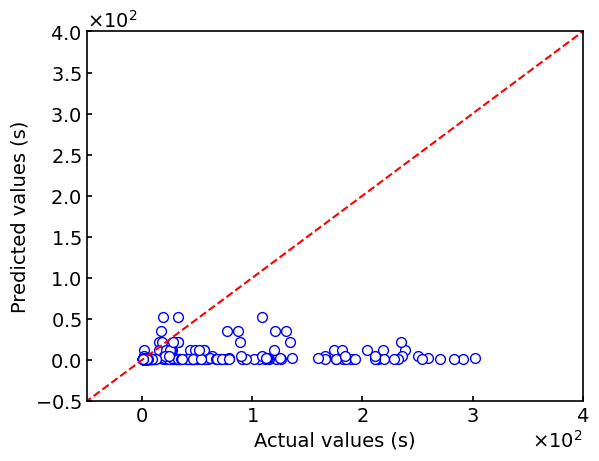

In [17]:
from ml_dcs.internal.graph.graph import GraphUtil
import json
from ml_dcs.domain.ml_gnn import GNNTestingResult
from ml_dcs.domain.graph import Graph, PredictionAccuracyGraphData

with open(GNN_INPUT_PATH_L3, "r") as f:
    data_dict = json.load(f)
data_model = GNNTestingResult(**data_dict)
print(data_model.model_dump_json(indent=2, by_alias=True))
data = PredictionAccuracyGraphData.from_ml_gnn_class_div1000(data_model)
graph = Graph(
    data=data,
    x_label=X_LABEL,
    y_label=Y_LABEL,
    x_lim=LIM,
    y_lim=LIM,
    order_of_mag=ORDER_OF_MAG
)
util = GraphUtil(graph)
util.show()

results_mae.append(data_model.mae)
results_rmse.append(data_model.rmse)

In [18]:
# FOR TABLE
import pandas as pd

pd.DataFrame({
    "MAE": [v/1000 for v in results_mae],
    "RMSE": [v/1000 for v in results_rmse]
})

,MAE,RMSE
0,28.908489,44.348943
1,22.661127,43.678651
2,36.674533,49.568211
3,23.072315,57.854411
4,19.911262,50.800721
5,20.359055,50.133587
6,23.069306,58.373394
